# Evaluate the Harmony question matcher using the existing McElroy et al harmonisation tool as a gold standard

This is a validation of Harmony against the questionnaire harmonisation tool developed by McElroy et al in 2020.

You can read in detail about the validation report here:

https://harmonydata.org/measuring-the-performance-of-nlp-algorithms/

You can read an explanation of the technologies evaluated here:

https://harmonydata.org/how-does-harmony-work/

In [1]:
MODEL_NAME = "Model 9: Transformer with cosine similarity and preprocessing for opposite senses\nMSTSb_paraphrase-xlm-r-multilingual-v1"

import sys
sys.path.append("../front_end")
from utils.question_matcher_transformer_huggingface_negation_efficient import QuestionMatcherTransformerHuggingFaceNegationEfficient
qm = QuestionMatcherTransformerHuggingFaceNegationEfficient('AIDA-UPM/MSTSb_paraphrase-xlm-r-multilingual-v1')
match_function = lambda question_dfs : qm.match_questions(question_dfs, is_use_cosine_similarity=True)

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/harmony/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
from load_validation_data import validation_data
from validation import validate

<Figure size 800x800 with 0 Axes>

Validating on dataset McElroy et al Childhood
	Processing 47 instruments of average length 23 questions each


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/harmony/lib/python3.10/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  a = torch.tensor(a)


	Calculated 562315 match scores
	Generated 40708 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Tries to Stop Quarrels,Is kind to younger children,0.01,1
1,Is Kind to Animals,Child smiles when child sees their parent(s),0.01,1
2,Often complains of aches and pains,Do you suffer from indigestion,0.02,1
3,Helps Round House Voluntary,Child smiles when child sees their parent(s),0.03,1
4,Tries to Stop Quarrels,Is considerate of other people's feelings,0.03,1
5,Gets on better with adults than with other children,her own rather solitary,0.03,1
6,Child really enjoys life,Do you often feel depressed,0.04,1
7,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.04,1
8,"Is Independent, Confident","Overcompetitive with other children""",0.04,1
9,Is Disobedient,Often argumentative with adults,0.04,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Has Stutter or Stammer,Has a stutter or stammer,0.93,0
1,Child bullies other children,Is bullied by other children,0.88,0
2,Cannot settle to anything for more than a few moments,Child cannot settle to do anything for more than a few moments,0.83,0
3,"Overcompetitive with other children""","diffident about competing with other children""",0.80,0
4,"Has many worries, often seems worried","Has many fears, is easily scared",0.79,0
5,Fights With Other Children,"diffident about competing with other children""",0.77,0
6,"Has many worries, often seems worried","Tends to become unduly miserable or worried""",0.75,0
7,Child fights with other children,"diffident about competing with other children""",0.75,0
8,"Has many fears, is easily scared","Often worried, worries about many things",0.75,0
9,Child destroys her own things or those belonging to others,Child takes things belonging to others,0.74,0


Validating on dataset McElroy et al Adulthood
	Processing 28 instruments of average length 16 questions each
	Calculated 95600 match scores
	Generated 9468 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
1,I laughed a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.05,1
2,Have you been a happy person,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.05,1
3,Do you suffer from indigestion,Been feeling perfectly well and in good health,0.07,1
4,I felt happy,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.07,1
5,"Have you at times had a twitching of the face, head or shoulders",Been feeling perfectly well and in good health,0.07,1
6,I thought nobody really loved me,Been satisfied with the way you've carried out your task,0.08,1
7,I felt I was no good anymore,Been satisfied with the way you've carried out your task,0.09,1
8,I felt I was a bad person,Been satisfied with the way you've carried out your task,0.10,1
9,Do you often get into a violent rage,Does every little thing get on your nerves and wear you out,0.10,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Have you been a very nervous person,Have you ever had a nervous breakdown,0.81,0
1,Do you often feel tired most of the time,Do you usually have great difficulty in falling or staying asleep,0.76,0
2,Do you often get worried about things,Do you often suddenly become scared for no good reason,0.74,0
3,Have you felt so down in the dumps that nothing could cheer you up,"During the last days, about how often did you feel so depressed nothing could cheer you up",0.73,0
4,I felt happy,I felt really positive about the future,0.73,0
5,Felt that life is entirely hopeless,Felt that life isn't worth living,0.73,0
6,"Do you have any special fears, like some people are scared of feathers, or cats, or spiders, or birds (rate phobias)",have you been frightened or worried about becoming ill or about dying,0.72,0
7,Do you usually have great difficulty in falling or staying asleep,Do you feel tired most of the time,0.72,0
8,"been feeling reasonably happy, all things considered",Been feeling perfectly well and in good health,0.72,0
9,"Do you often feel on edge, or keyed up, or mentally tense or strained (rate nervous tension)","have you been in situations such as in a crowd or an enclosed space or meeting people, when you became unduly anxious",0.71,0


Validating on dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Trouble relaxing,Dificuldade para relaxar,0.69,1
1,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.78,1
2,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.84,1
3,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.85,1
4,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.86,1
5,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.93,1
6,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.97,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"Feeling nervous, anxious, or on edge",Sentir medo como se algo horrível fosse acontecer,0.69,0
1,"Feeling afraid, as if something awful might happen","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.68,0
2,"Feeling nervous, anxious, or on edge",Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.59,0
3,Becoming easily annoyed or irritable,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.52,0
4,Being so restless that it is hard to sit still,Dificuldade para relaxar,0.52,0
5,"Feeling nervous, anxious, or on edge",Preocupar-se muito com diversas coisas,0.50,0
6,Not being able to stop or control worrying,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.50,0
7,Not being able to stop or control worrying,Preocupar-se muito com diversas coisas,0.48,0
8,Not being able to stop or control worrying,Sentir medo como se algo horrível fosse acontecer,0.48,0
9,"Feeling afraid, as if something awful might happen",Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.48,0


Validating on dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
	Processing 2 instruments of average length 73 questions each
	Calculated 3025 match scores
	Generated 3025 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES BHRCS SDQ/CBCL (PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,É barulhento(a) demais,Pensa nas coisas antes de fazê-las,0.14,1
1,É alvo de muitas gozações,Outras crianças pegam no pé ou a atormentam,0.21,1
2,Gosta de gozar dos outros,Frequentemente briga com outros jovens ou os amedronta,0.27,1
3,Fala demais,Pensa nas coisas antes de fazê-las,0.28,1
4,Grita muito,Frequentemente tem acessos de raiva ou crises de birra,0.30,1
5,Não se dá bem com outras crianças,Tem pelo menos um bom amigo ou uma boa amiga,0.32,1
6,Fica emburrado(a) facilmente,Frequentemente tem acessos de raiva ou crises de birra,0.32,1
7,Acha que tem que fazer tudo perfeito,"Fica inseguro quando tem que fazer alguma coisa pela primeira vez, facilmente perde a confiança em si mesmo",0.34,1
8,Não vai bem na escola,"Completa as tarefas que começa, tem boa concentração",0.34,1
9,"Desrespeita as regras em casa, na escola ou em outros lugares",Geralmente é obediente e faz normalmente o que os adultos lhe pedem,0.34,1



FALSE POSITIVES OR WEAKEST REJECTIONS BHRCS SDQ/CBCL (PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"É teimoso(a), mal humorado(a) ou fácil de se irritar","Frequentemente parece triste, desanimado ou choroso",0.66,0
1,Tem medo de pensar ou fazer alguma coisa má,"Tem muitos medos, assusta-se facilmente",0.65,0
2,"Desrespeita as regras em casa, na escola ou em outros lugares","Rouba coisas de casa, da escola ou de outros lugares",0.65,0
3,Tem mudanças repentinas de humor ou de sentimentos,"Frequentemente parece triste, desanimado ou choroso",0.61,0
4,Não se dá bem com outras crianças,"Tem boa vontade em compartilhar doces, brinquedos, lápis com outros jovens",0.61,0
5,É impulsivo(a) ou age sem pensar,Frequentemente engana ou mente,0.61,0
6,Não se dá bem com outras crianças,É gentil com crianças mais novas,0.60,0
7,Tem medo de pensar ou fazer alguma coisa má,"Tenta ser atencioso se alguém parece magoado, aflito ou se sentindo mal",0.59,0
8,Não se dá bem com outras crianças,Outras crianças pegam no pé ou a atormentam,0.57,0
9,É muito medroso(a) ou ansioso(a),"Frequentemente parece triste, desanimado ou choroso",0.57,0


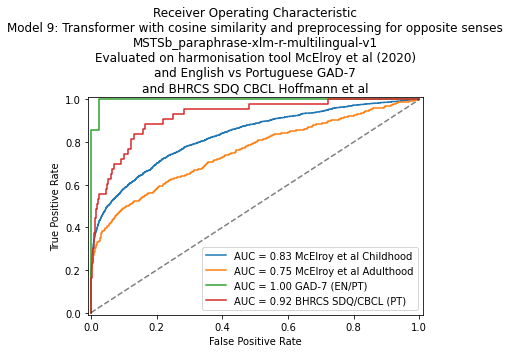

In [3]:
validate(validation_data, match_function, MODEL_NAME)